In [2]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import roc_auc_score
from IPython.display import display
from sklearn.metrics import roc_auc_score

%matplotlib inline 
path="c:/data/"

In [3]:
app = pd.read_csv("appIication_train.csv")

In [4]:
app

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.067336,0.498034
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.070866,0.208735
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.011814,0.499996
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.159914,0.431746
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.152426,0.236842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.025306,0.618372
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,-17.581737,0.267111
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,1.0,0.0,0.0,1.0,0.0,1.0,0.529302,0.225775
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.400167,0.462027


In [5]:
def split_train(data,test_ratio):
    np.random.seed(0)
    shuffled_indices=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices =shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [6]:
data_target = app[["SK_ID_CURR", "TARGET"]]

In [7]:
data_target_train, data_target_validtest = split_train(data_target,0.2)

In [8]:
data_target_valid, data_target_test =  split_train(data_target_validtest,0.5)

In [9]:
cash = pd.read_csv( 'POS_CASH_balance.csv')

In [10]:
cash  = cash.sort_values(by=['SK_ID_CURR',"SK_ID_PREV"],ascending=True,axis=0)

In [11]:
cash

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
2197888,1369693,100001,-53,4.0,0.0,Completed,0,0
4704415,1369693,100001,-54,4.0,1.0,Active,0,0
7167007,1369693,100001,-57,4.0,4.0,Active,0,0
7823681,1369693,100001,-55,4.0,2.0,Active,0,0
8789081,1369693,100001,-56,4.0,3.0,Active,0,0
...,...,...,...,...,...,...,...,...
6836368,2631384,456255,-21,36.0,31.0,Active,0,0
573934,2729207,456255,-15,6.0,5.0,Active,0,0
8159633,2729207,456255,-16,6.0,6.0,Active,0,0
8514315,2729207,456255,-13,3.0,0.0,Completed,0,0


In [12]:
for col in cash.columns:
    print("\n %s 属性的不同取值和出现的次数" %col)
    print(cash[col].value_counts())


 SK_ID_PREV 属性的不同取值和出现的次数
2404432    96
1323129    96
2347821    96
1843580    96
1257852    96
           ..
2819727     1
2015469     1
2104535     1
1001595     1
1814932     1
Name: SK_ID_PREV, Length: 936325, dtype: int64

 SK_ID_CURR 属性的不同取值和出现的次数
265042    295
172612    247
309133    246
127659    245
197583    245
         ... 
230563      1
408719      1
346169      1
100224      1
430611      1
Name: SK_ID_CURR, Length: 337252, dtype: int64

 MONTHS_BALANCE 属性的不同取值和出现的次数
-10    216441
-11    216023
-9     215558
-12    214716
-8     214149
        ...  
-92     42283
-93     41025
-94     39900
-95     38514
-96     36448
Name: MONTHS_BALANCE, Length: 96, dtype: int64

 CNT_INSTALMENT 属性的不同取值和出现的次数
12.0    2496845
24.0    1517472
10.0    1243449
6.0     1065500
18.0     727394
         ...   
63.0          2
70.0          2
92.0          1
68.0          1
81.0          1
Name: CNT_INSTALMENT, Length: 73, dtype: int64

 CNT_INSTALMENT_FUTURE 属性的不同取值和出现的次数
0.0     1185960
6.0 

In [13]:
# 判断是否逾期，预期一天也是逾期
cash['POS_IS_DPD'] = cash['SK_DPD'].apply(lambda x: 1 if x > 0 else 0)

In [14]:
# 逾期在1到120天以内
cash['POS_IS_DPD_UNDER_120'] = cash['SK_DPD'].apply(lambda x:1 if (x > 0) & (x <120) else 0 )

In [15]:
# 逾期120天以上
cash['POS_IS_DPD_OVER_120'] = cash['SK_DPD'].apply(lambda x:1 if x >= 120 else 0)

In [16]:
cash.head(20)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,POS_IS_DPD,POS_IS_DPD_UNDER_120,POS_IS_DPD_OVER_120
2197888,1369693,100001,-53,4.0,0.0,Completed,0,0,0,0,0
4704415,1369693,100001,-54,4.0,1.0,Active,0,0,0,0,0
7167007,1369693,100001,-57,4.0,4.0,Active,0,0,0,0,0
7823681,1369693,100001,-55,4.0,2.0,Active,0,0,0,0,0
8789081,1369693,100001,-56,4.0,3.0,Active,0,0,0,0,0
1261679,1851984,100001,-96,4.0,2.0,Active,0,0,0,0,0
1891462,1851984,100001,-95,4.0,1.0,Active,7,7,1,1,0
4928574,1851984,100001,-93,4.0,0.0,Completed,0,0,0,0,0
8531326,1851984,100001,-94,4.0,0.0,Active,0,0,0,0,0
513222,1038818,100002,-13,24.0,18.0,Active,0,0,0,0,0


In [17]:
cash["MONTHS_BALANCE"] = cash["MONTHS_BALANCE"] * -1

In [18]:
def one_hot_encoder(df):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= True)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

In [19]:
cash, new_cash_col = one_hot_encoder(cash) 

In [20]:
cash

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF,POS_IS_DPD,POS_IS_DPD_UNDER_120,POS_IS_DPD_OVER_120,NAME_CONTRACT_STATUS_Active,NAME_CONTRACT_STATUS_Amortized debt,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Completed,NAME_CONTRACT_STATUS_Demand,NAME_CONTRACT_STATUS_Returned to the store,NAME_CONTRACT_STATUS_Signed,NAME_CONTRACT_STATUS_XNA,NAME_CONTRACT_STATUS_nan
2197888,1369693,100001,53,4.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4704415,1369693,100001,54,4.0,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7167007,1369693,100001,57,4.0,4.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7823681,1369693,100001,55,4.0,2.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8789081,1369693,100001,56,4.0,3.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6836368,2631384,456255,21,36.0,31.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
573934,2729207,456255,15,6.0,5.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8159633,2729207,456255,16,6.0,6.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8514315,2729207,456255,13,3.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [21]:
cash.fillna(0, inplace=True)

In [22]:
all_columns = list(cash.columns.values)
# 前两列不需要归一化
all_columns = all_columns[2:len(all_columns)]
all_columns

['MONTHS_BALANCE',
 'CNT_INSTALMENT',
 'CNT_INSTALMENT_FUTURE',
 'SK_DPD',
 'SK_DPD_DEF',
 'POS_IS_DPD',
 'POS_IS_DPD_UNDER_120',
 'POS_IS_DPD_OVER_120',
 'NAME_CONTRACT_STATUS_Active',
 'NAME_CONTRACT_STATUS_Amortized debt',
 'NAME_CONTRACT_STATUS_Approved',
 'NAME_CONTRACT_STATUS_Canceled',
 'NAME_CONTRACT_STATUS_Completed',
 'NAME_CONTRACT_STATUS_Demand',
 'NAME_CONTRACT_STATUS_Returned to the store',
 'NAME_CONTRACT_STATUS_Signed',
 'NAME_CONTRACT_STATUS_XNA',
 'NAME_CONTRACT_STATUS_nan']

In [23]:
for column in all_columns:
    cash[column] = (cash[column] - cash[column].min()) / (cash[column].max()-cash[column].min() + 1)

In [24]:
cash.shape

(10001358, 20)

In [ ]:
cash_data = cash.groupby("SK_ID_CURR").apply(lambda x: x.values[None, :, 2:])

In [ ]:
cash_data

In [ ]:
cash_data = cash_data.apply(lambda x: x if x is not np.nan else np.zeros((1,1, cash.shape[1]-2)))

In [ ]:
cash_data = cash_data.apply(lambda x: np.pad(x,((0,0),(0,100 - x.shape[1]),(0,0)), "constant") if x.shape[1] < 100 else x[ :,:100, :])

In [ ]:
cash_data.values[0].shape

In [ ]:
cash_data.values[1]

In [ ]:
cash_dataframe = pd.DataFrame({
#     "SK_ID_CURR": cash_data.index,
    "cash":cash_data
})

In [ ]:
cash_result_train = pd.merge(cash_dataframe, data_target_train, on = "SK_ID_CURR", how = "right")

In [ ]:
cash_result_valid = pd.merge(cash_dataframe, data_target_valid, on = "SK_ID_CURR", how = "right")

In [ ]:
cash_result_test = pd.merge(cash_dataframe, data_target_test, on = "SK_ID_CURR", how = "right")

In [ ]:
cash_result = pd.merge(cash_dataframe, data_target, on = "SK_ID_CURR", how = "right")

In [ ]:
cash_result_train.cash[0].shape

In [ ]:
cash_result_train["cash"] = cash_result_train["cash"].apply(lambda x: x if x is not np.nan else np.zeros((1,1, cash.shape[1]-2)))

In [ ]:
cash_result_train["cash"] =  cash_result_train["cash"].apply(lambda x: np.pad(x,((0,0),(0,100 - x.shape[1]),(0,0)), "constant") if x.shape[1] < 100 else x[ :,:100, :])

In [ ]:
cash_result_train.shape

In [ ]:
cash_result_valid["cash"] = cash_result_valid["cash"].apply(lambda x: x if x is not np.nan else np.zeros((1,1, cash.shape[1]-2)))

In [ ]:
cash_result_valid["cash"] =  cash_result_valid["cash"].apply(lambda x: np.pad(x,((0,0),(0,100 - x.shape[1]),(0,0)), "constant") if x.shape[1] < 100 else x[ :,:100, :])

array([[[0.14583333, 0.08602151, 0.06976744, ..., 0.        ,
         0.        , 0.        ],
        [0.15625   , 0.08602151, 0.08139535, ..., 0.        ,
         0.        , 0.        ],
        [0.10416667, 0.08602151, 0.02325581, ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]]])

In [72]:
cash_result_valid.to_csv("C:/data/cash_data_valid.csv")

In [75]:
# cash_result_test.to_csv("C:/data/cash_data_test.csv")

In [49]:
# cash_result.to_csv("C:/data/cash_data.csv")

In [50]:
X_train = np.concatenate(cash_result_train.cash.values)

In [51]:
X_train.shape

(246009, 100, 18)

In [ ]:
# X_train.tofile("C:/data/X_train.bin")

(337252, 100, 20)

In [53]:
X_valid = np.concatenate(cash_result_valid.cash.values)

In [54]:
y_train = cash_result_train.TARGET.values

In [71]:
y_train.shape

(246009,)

In [55]:
y_valid = cash_result_valid.TARGET.values

In [65]:
import tensorflow as tf
from keras.layers import Input, Dense, TimeDistributed, concatenate, Flatten, Lambda, LSTM, Convolution1D, MaxPooling1D
from keras.models import Sequential, Model
from tensorflow.keras.optimizers import SGD,Adam
import numpy as np
import pandas as pd
import os

In [67]:
# 最后在定义模型
model_input = Input(shape=X_train.shape[1:],name = "cash")
layers_con1 = Convolution1D(filters=8,kernel_size = 3, padding = "same", activation=tf.nn.relu)(model_input)
layers_con2 = Convolution1D(filters=8,kernel_size = 3, padding = "same", activation=tf.nn.relu)(layers_con1)
layers_max2 = MaxPooling1D(pool_size=2, strides = 2, padding = 'same')(layers_con2)


layers_con3 = Convolution1D(filters=16, kernel_size = 3, padding = "same", activation=tf.nn.relu)(layers_max2)
layers_con4 = Convolution1D(filters=16, kernel_size = 3, padding = "same", activation=tf.nn.relu)(layers_con3)
layers_max4 = MaxPooling1D(pool_size=2, strides = 2, padding = 'same')(layers_con4)

layers_con5 = Convolution1D(filters=32, kernel_size = 3, padding = "same", activation=tf.nn.relu)(layers_max4)
layers_con6 = Convolution1D(filters=32, kernel_size = 3, padding = "same", activation=tf.nn.relu)(layers_con5)
layers_max6 = MaxPooling1D(pool_size=2, strides = 2, padding = 'same')(layers_con6)


fc1 = Dense(128, activation="relu")(layers_max6)
fc2 = Dense(64, activation="relu")(fc1)
fc3 = Dense(32, activation="relu")(fc2)
fc4 = Dense(1, activation="sigmoid")(fc3)
model = Model(inputs=[model_input], outputs=fc4)

In [68]:
# export CUDA_VISIBLE_DEVICES=1

In [76]:
import os
os.environ['CUDA_VISIBLE_DEVICES']= "0"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
tf.random.set_seed(2345)
# sgd = SGD(lr = 0.2)
adam = Adam(lr = 0.001) # 模型优化可以自己选择


model.compile(
    optimizer = adam,
#     loss = 'mse',
    loss = 'binary_crossentropy',
    metrics = ["accuracy"]
)

# 训练模型

model.fit(X_train, y_train, batch_size=512, epochs = 10)

# # 训练3001次
# for step in range(3001):
#     # 每次训练一个批次
#     cost = model.train_on_batch(X_train, y_train)
#     if step % 500 == 0:
#         print('cost:', cost)

# loss, accuracy = model.evaluate(X_test, y_test)

# model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ["accuracy"])
# for i in range(10):
#     print("=================第",i+1,"次===============")
#     model.fit(X_train, y_train, batch_size=64)
#     print("ROC_AUC para iteracion",i + 1,":", roc_auc_score(y_train, model.predict(X_train)[:, -1]), " - ", roc_auc_score(y_valid, model.predict(X_valid)[:, -1]))

# print("\ntest loss", loss)
# print("accuracy", accuracy)

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [1]:
import tensorflow as tf
from keras.layers import Input, Dense, TimeDistributed, concatenate, Flatten, Lambda, LSTM, Convolution1D, MaxPooling1D,UpSampling1D, Activation
from keras.models import Sequential, Model
from tensorflow.keras.optimizers import SGD,Adam
import numpy as np
import pandas as pd
import os
from keras.layers import Multiply

from matplotlib import pyplot as plt

num_filters = 8
kernel_size = 5
units = 32

print(tf.config.list_physical_devices('GPU'))
print(tf.config.list_physical_devices('CPU'))
# os.environ["TF_GPU_ALLOCATOR"] = "cuda_malloc_async"
# 数据

os.environ['CUDA_VISIBLE_DEVICES']=  '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
tf.random.set_seed(2345)

dim_size = 64

app = pd.read_csv("c:/data/application_train.csv")

def split_train(data,test_ratio):
    np.random.seed(0)
    shuffled_indices=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices =shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

def one_hot_encoder(df):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= True)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

data_target = app[["SK_ID_CURR", "TARGET"]]

data_target_train, data_target_validtest = split_train(data_target,0.2)

data_target_valid, data_target_test =  split_train(data_target_validtest,0.5)



[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [2]:
cash = pd.read_csv( 'c:/data/POS_CASH_balance.csv')
cash['POS_IS_DPD'] = cash['SK_DPD'].apply(lambda x: 1 if x > 0 else 0)
cash['POS_IS_DPD_UNDER_120'] = cash['SK_DPD'].apply(lambda x:1 if (x > 0) & (x <120) else 0 )
cash['POS_IS_DPD_OVER_120'] = cash['SK_DPD'].apply(lambda x:1 if x >= 120 else 0)


cash["MONTHS_BALANCE"] = cash["MONTHS_BALANCE"] * -1
cash, new_cash_col = one_hot_encoder(cash)

cash.fillna(0, inplace=True)
all_columns = list(cash.columns.values)
# 前两列不需要归一化
all_columns = all_columns[2:len(all_columns)]

for column in all_columns:
    cash[column] = (cash[column] - cash[column].min()) / (cash[column].max()-cash[column].min() + 1)

cash_data = cash.groupby("SK_ID_CURR").apply(lambda x: x.values[None, :, 2:])
cash_data = cash_data.apply(lambda x: x if x is not np.nan else np.zeros((1,1, cash.shape[1]-2)))
cash_data = cash_data.apply(lambda x: np.pad(x,((0,0),(0, dim_size - x.shape[1]),(0,0)), "constant") if x.shape[1] < dim_size else x[ :,:dim_size, :])

cash_dataframe = pd.DataFrame({
#     "SK_ID_CURR": cash_data.index,
    "cash":cash_data
})


cash_result_train = pd.merge(cash_dataframe, data_target_train, on = "SK_ID_CURR", how = "right")

cash_result_valid = pd.merge(cash_dataframe, data_target_valid, on = "SK_ID_CURR", how = "right")

cash_result_test = pd.merge(cash_dataframe, data_target_test, on = "SK_ID_CURR", how = "right")


cash_result = pd.merge(cash_dataframe, data_target, on = "SK_ID_CURR", how = "right")



In [3]:
cash_result_train["cash"] = cash_result_train["cash"].apply(lambda x: x if x is not np.nan else np.zeros((1,1, cash.shape[1]-2)))
cash_result_train["cash"] =  cash_result_train["cash"].apply(lambda x: np.pad(x,((0,0),(0,dim_size - x.shape[1]),(0,0)), "constant") if x.shape[1] < dim_size else x[ :,:dim_size, :])
cash_result_valid["cash"] = cash_result_valid["cash"].apply(lambda x: x if x is not np.nan else np.zeros((1,1, cash.shape[1]-2)))
cash_result_valid["cash"] =  cash_result_valid["cash"].apply(lambda x: np.pad(x,((0,0),(0,dim_size - x.shape[1]),(0,0)), "constant") if x.shape[1] < dim_size else x[ :,:dim_size, :])

cash_result_test["cash"] = cash_result_test["cash"].apply(lambda x: x if x is not np.nan else np.zeros((1,1, cash.shape[1]-2)))
cash_result_test["cash"] =  cash_result_test["cash"].apply(lambda x: np.pad(x,((0,0),(0,dim_size - x.shape[1]),(0,0)), "constant") if x.shape[1] < dim_size else x[ :,:dim_size, :])

X_train = np.concatenate(cash_result_train.cash.values)

X_valid = np.concatenate(cash_result_valid.cash.values)

X_test = np.concatenate(cash_result_test.cash.values)

y_train = cash_result_train.TARGET.values

y_valid = cash_result_valid.TARGET.values

y_test = cash_result_test.TARGET.values

print(X_train.shape)



(246009, 64, 18)


In [4]:
model_input = Input(shape=(dim_size,18), name = "cash")
layers_attention_con1 = Convolution1D(filters=num_filters*2,kernel_size = kernel_size, padding = "same", activation=tf.nn.relu)(model_input)
layers_attention_con2 = Convolution1D(filters=num_filters*2,kernel_size = kernel_size, padding = "same", activation=tf.nn.relu)(layers_attention_con1)
layers_attention_max2 = MaxPooling1D(pool_size=2, strides = 2, padding = 'same')(layers_attention_con2)

layers_attention_con3 = Convolution1D(filters=num_filters*2,kernel_size = kernel_size, padding = "same", activation=tf.nn.relu)(layers_attention_max2)
layers_attention_con4 = Convolution1D(filters=num_filters*2,kernel_size = kernel_size, padding = "same", activation=tf.nn.relu)(layers_attention_con3)
layers_attention_max4 = MaxPooling1D(pool_size=2, strides = 2, padding = 'same')(layers_attention_con4)

layers_attention_con5 = Convolution1D(filters=num_filters*4,kernel_size = kernel_size, padding = "same", activation=tf.nn.relu)(layers_attention_max4)
layers_attention_con6 = Convolution1D(filters=num_filters*4,kernel_size = kernel_size, padding = "same", activation=tf.nn.relu)(layers_attention_con5)
layers_attention_max6 = MaxPooling1D(pool_size=2, strides = 2, padding = 'same')(layers_attention_con6)

layers_attention_con7 = Convolution1D(filters=num_filters*4,kernel_size = kernel_size, padding = "same", activation=tf.nn.relu)(layers_attention_max6)
layers_attention_con8 = Convolution1D(filters=num_filters*4,kernel_size = kernel_size, padding = "same", activation=tf.nn.relu)(layers_attention_con7)
layers_attention_con9 = Convolution1D(filters=num_filters*4,kernel_size = 1, padding = "same", activation=tf.nn.relu)(layers_attention_con8)

layers_attention_up9 =  UpSampling1D(size=4)(layers_attention_con9)

layers_attention_ac = Activation("sigmoid")(layers_attention_up9)

# CNN
layers_cnn_con1 = Convolution1D(filters=num_filters,kernel_size = 3, padding = "same", activation=tf.nn.relu)(model_input)
layers_cnn_con2 = Convolution1D(filters=num_filters*2,kernel_size = 3, padding = "same", activation=tf.nn.relu)(layers_cnn_con1)
layers_cnn_con3 = Convolution1D(filters=num_filters*4,kernel_size = 3, padding = "same", activation=tf.nn.relu)(layers_cnn_con2)
layers_cnn_max2 = MaxPooling1D(pool_size=2, strides = 2, padding = 'same')(layers_cnn_con3)

cnn_attention = Multiply()([layers_attention_ac, layers_cnn_max2])

flatten = Flatten()(cnn_attention)

fc1 = Dense(units * 2, activation="relu")(flatten)
fc2 = Dense(units, activation="relu")(fc1)
fc3 = Dense(1, activation="sigmoid")(fc2)
model = Model(inputs=model_input, outputs=fc3)

# for i in range(len(model.layers)):
#     print(model.get_layer(index=i).output)

In [5]:
adam = Adam(learning_rate = 0.02) # 模型优化可以自己选择

print("训练开始")


# def auc(y_true, y_pred):
#     auc = tf.metrics.auc(y_true, y_pred)[1]
#     return auc


model.compile(
    optimizer = adam,
    loss = 'binary_crossentropy',
    metrics = ["accuracy", tf.keras.metrics.AUC()]
)

# 训练模型

history = model.fit(X_train, y_train, batch_size=1024, validation_data=(X_valid, y_valid),epochs = 20)

print(history.history.keys())

scores = model.evaluate(X_test, y_test, verbose=0)
print('%s: %.2f%%' % (model.metrics_names[1], scores[1] * 100))

训练开始
Epoch 1/20
241/241 [==============================] - 12s 25ms/step - loss: 0.2852 - accuracy: 0.9174 - auc: 0.5403 - val_loss: 0.2813 - val_accuracy: 0.9204 - val_auc: 0.5840
Epoch 2/20
241/241 [==============================] - 5s 19ms/step - loss: 0.2801 - accuracy: 0.9188 - auc: 0.5613 - val_loss: 0.2747 - val_accuracy: 0.9204 - val_auc: 0.5863
Epoch 3/20
241/241 [==============================] - 5s 19ms/step - loss: 0.2790 - accuracy: 0.9188 - auc: 0.5740 - val_loss: 0.2747 - val_accuracy: 0.9204 - val_auc: 0.5937
Epoch 4/20
241/241 [==============================] - 5s 19ms/step - loss: 0.2785 - accuracy: 0.9188 - auc: 0.5793 - val_loss: 0.2735 - val_accuracy: 0.9204 - val_auc: 0.5971
Epoch 5/20
241/241 [==============================] - 5s 19ms/step - loss: 0.2784 - accuracy: 0.9188 - auc: 0.5807 - val_loss: 0.2736 - val_accuracy: 0.9204 - val_auc: 0.5945
Epoch 6/20
241/241 [==============================] - 5s 19ms/step - loss: 0.2782 - accuracy: 0.9188 - auc: 0.5842 - va

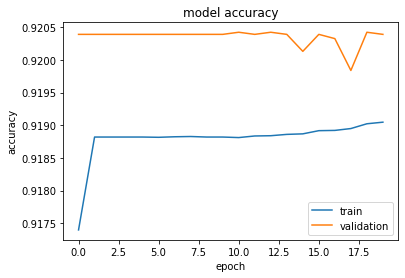

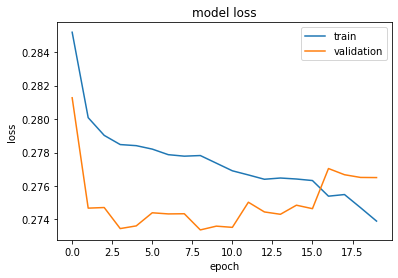

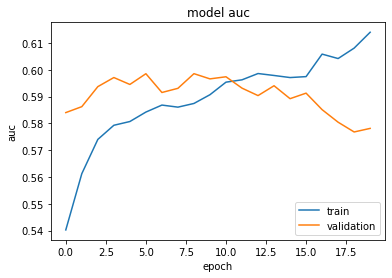

In [7]:
# accuracy的历史
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

# loss的历史
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


# auc的历史
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model auc')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

pd.DataFrame(history.history).to_csv('c:/data/attention_cnn_train_log.csv', index=False)

In [10]:
for i in range(len(model.layers)):
    print(model.get_layer(index=i).output)

KerasTensor(type_spec=TensorSpec(shape=(None, 64, 18), dtype=tf.float32, name='cash'), name='cash', description="created by layer 'cash'")
KerasTensor(type_spec=TensorSpec(shape=(None, 64, 16), dtype=tf.float32, name=None), name='conv1d/Relu:0', description="created by layer 'conv1d'")
KerasTensor(type_spec=TensorSpec(shape=(None, 64, 16), dtype=tf.float32, name=None), name='conv1d_1/Relu:0', description="created by layer 'conv1d_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 32, 16), dtype=tf.float32, name=None), name='max_pooling1d/Squeeze:0', description="created by layer 'max_pooling1d'")
KerasTensor(type_spec=TensorSpec(shape=(None, 32, 16), dtype=tf.float32, name=None), name='conv1d_2/Relu:0', description="created by layer 'conv1d_2'")
KerasTensor(type_spec=TensorSpec(shape=(None, 32, 16), dtype=tf.float32, name=None), name='conv1d_3/Relu:0', description="created by layer 'conv1d_3'")
KerasTensor(type_spec=TensorSpec(shape=(None, 16, 16), dtype=tf.float32, name=None), name='m

In [11]:
functor = tf.keras.backend.function([model.layers[0].input],[model.layers[-2].output])

In [12]:
predict=functor([X_train])

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [14]:
model.save("c:/data/attenton_cnn_model.h5")

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [1]:
from keras.models import load_model
model = load_model("c:/data/attenton_cnn_model.h5")

In [7]:
cash_result["cash"] = cash_result["cash"].apply(lambda x: x if x is not np.nan else np.zeros((1,1, cash.shape[1]-2)))
cash_result["cash"] =  cash_result["cash"].apply(lambda x: np.pad(x,((0,0),(0,dim_size - x.shape[1]),(0,0)), "constant") if x.shape[1] < dim_size else x[ :,:dim_size, :])

X_all_train = np.concatenate(cash_result.cash.values)


y_all_train = cash_result.TARGET.values

In [8]:
functor = tf.keras.backend.function([model.layers[0].input], [model.layers[-2].output])

In [12]:
X_all_train.shape

(307511, 64, 18)

In [13]:
model.layers[0].input

<KerasTensor: shape=(None, 64, 18) dtype=float32 (created by layer 'cash')>

In [14]:
predict=functor([X_all_train])

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [ ]:
predict

In [11]:
scores = model.evaluate(X_test, y_test, verbose=0)
print('%s: %.2f%%' % (model.metrics_names[1], scores[1] * 100))

accuracy: 92.17%


In [4]:
import pandas as pd
p = pd.read_csv("C:/data/processing_data/CNN_Feature.csv")

In [10]:
p

,SK_ID_CURR,CNN_1,CNN_2,CNN_3,CNN_4,CNN_5,CNN_6,CNN_7,CNN_8,CNN_9,...,CNN_23,CNN_24,CNN_25,CNN_26,CNN_27,CNN_28,CNN_29,CNN_30,CNN_31,CNN_32
0,100002,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,3.069275,0.0,0.0
1,100003,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,3.528812,0.0,0.0
2,100004,0.0,0.0,0.0,0.181746,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,3.192601,0.0,0.0
3,100006,0.0,0.0,0.0,0.246409,0.0,0.208991,0.0,0.0,0.0,...,0.199338,0.0,0.0,0.0,0.116613,0.0,0.0,1.764950,0.0,0.0
4,100007,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,7.918046,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.970189,0.0,0.0
307507,456252,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,2.457493,0.0,0.0
307508,456253,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,4.154480,0.0,0.0
307509,456254,0.0,0.0,0.0,0.199070,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,2.115789,0.0,0.0


In [6]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

Your selected dataframe has 33 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [8]:
for col in p.columns:
    print("\n %s 属性的不同取值和出现的次数" %col)
    print(p[col].value_counts())


 SK_ID_CURR 属性的不同取值和出现的次数
100002    1
337664    1
337661    1
337660    1
337659    1
         ..
218992    1
218991    1
218990    1
218989    1
456255    1
Name: SK_ID_CURR, Length: 307511, dtype: int64

 CNN_1 属性的不同取值和出现的次数
0.000000     307455
0.149092          2
13.905313         1
0.295647          1
3.006319          1
1.150723          1
0.039752          1
2.892131          1
1.408988          1
3.547057          1
1.223433          1
1.764982          1
2.494057          1
1.639041          1
0.067240          1
0.257400          1
1.311464          1
0.618551          1
3.614645          1
3.394890          1
3.039717          1
4.606842          1
3.413352          1
3.372825          1
0.072777          1
2.731302          1
1.627707          1
0.347431          1
0.680720          1
1.001944          1
3.079769          1
1.345042          1
0.151125          1
4.402842          1
0.743154          1
1.720180          1
1.859655          1
2.911285          1
1.342262    